# PyTorch and Data Exploration Tutorial

This tutorial introduces you to PyTorch fundamentals and data handling techniques for machine learning and data science. Throughout this notebook, you'll learn about:

- Creating and manipulating PyTorch tensors
- Using broadcasting and indexing for efficient operations
- Working with probability distributions
- Loading and processing image data
- Analyzing tabular data from the Self Regulation Ontology (SRO) dataset
- Exploring language development data from Wordbank
- Analyzing neural data


In [ ]:
# Set up the environment with necessary imports
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
import h5py
import seaborn as sns
from scipy.optimize import curve_fit

# mount drive
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
LECTURE_DIRECTORY = "/content/drive/MyDrive/psych254a_2025/lecture1"

# 1. Introduction to PyTorch Tensors

PyTorch is a popular deep learning framework that provides an efficient tensor library with strong GPU acceleration capabilities. At its core are **tensors** - multi-dimensional arrays similar to NumPy arrays, but with additional features for deep learning.

Let's explore how to create and manipulate tensors:


In [ ]:
# Basic tensor creation examples
# Create a simple 1D tensor
x = torch.tensor([1, 2, 3, 4, 5])
print("1D tensor:", x)

# Create a 2D tensor (matrix)
y = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("2D tensor (matrix):\n", y)

# Create a tensor of zeros
zeros = torch.zeros(2, 3)
print("Zeros tensor:\n", zeros)

# Create a tensor of ones
ones = torch.ones(2, 2)
print("Ones tensor:\n", ones)

# Create a tensor with random values
random_tensor = torch.rand(2, 3)
print("Random tensor:\n", random_tensor)

1D tensor: tensor([1, 2, 3, 4, 5])
2D tensor (matrix):
 tensor([[1, 2, 3],
        [4, 5, 6]])
Zeros tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones tensor:
 tensor([[1., 1.],
        [1., 1.]])
Random tensor:
 tensor([[0.2241, 0.9717, 0.0562],
        [0.2246, 0.2089, 0.3935]])


## Problem 1.1

Construct the following tensor:

```
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
```

_Note: Use PyTorch functions rather than directly creating the tensor from a list._

**Example:** Here's a similar tensor with a different pattern:


In [ ]:
# Creating a 3x3 tensor with values 1-9
example_tensor = torch.arange(1, 10).reshape(3, 3)
print(example_tensor)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
# Your code here:
# tensor_1_1 = ?

## Problem 1.2

Construct the following tensor:

```
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

**Example:** Here's a way to transpose a tensor:


In [ ]:
# Creating a tensor and then transposing it
example_tensor2 = torch.arange(1, 10).reshape(3, 3)
print("Original tensor:")
print(example_tensor2)
print("\nTransposed tensor:")
print(example_tensor2.t())

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Transposed tensor:
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


In [ ]:
# Your code here:
# tensor_1_2 = ?

# 2. Tensor Operations and Broadcasting

PyTorch supports various operations on tensors, including element-wise operations, matrix multiplication, and broadcasting.

**Broadcasting** allows PyTorch to perform operations on tensors of different shapes by implicitly expanding the smaller tensor to match the shape of the larger one.


In [ ]:
# Basic tensor operations
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Addition
print("a + b =", a + b)

# Multiplication (element-wise)
print("a * b =", a * b)

# Matrix multiplication
c = torch.tensor([[1, 2], [3, 4]])
d = torch.tensor([[5, 6], [7, 8]])
print("Matrix multiplication c @ d:")
print(c @ d)  # @ is the matrix multiplication operator

# Broadcasting example
e = torch.tensor([1, 2, 3])
f = torch.tensor([[1], [2], [3]])
print("\nTensor e shape:", e.shape)
print("Tensor f shape:", f.shape)
print("e + f (broadcasting):")
print(e + f)

a + b = tensor([5, 7, 9])
a * b = tensor([ 4, 10, 18])
Matrix multiplication c @ d:
tensor([[19, 22],
        [43, 50]])

Tensor e shape: torch.Size([3])
Tensor f shape: torch.Size([3, 1])
e + f (broadcasting):
tensor([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]])


## Problem 2.1

Use broadcasting to create the following tensor:

```
tensor([[ 1,  2,  3,  4,  5],
        [ 2,  4,  6,  8, 10],
        [ 3,  6,  9, 12, 15],
        [ 4,  8, 12, 16, 20],
        [ 5, 10, 15, 20, 25]])
```

This is a multiplication table of 5x5. Think about how to use broadcasting to create it efficiently.

**Example:** Here's how to create a simple addition table using broadcasting:


In [ ]:
# Create row and column vectors
row = torch.tensor([0, 1, 2])
col = torch.tensor([[0], [1], [2]])

# Use broadcasting to create an addition table
addition_table = row + col
print("Addition table:\n", addition_table)

Addition table:
 tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]])


In [ ]:
# Your code here:
# multiplication_table = ?

# 3. Working with Images as Tensors

Images are naturally represented as tensors with dimensions representing height, width, and color channels.
Let's explore how to load and manipulate image data using PyTorch.


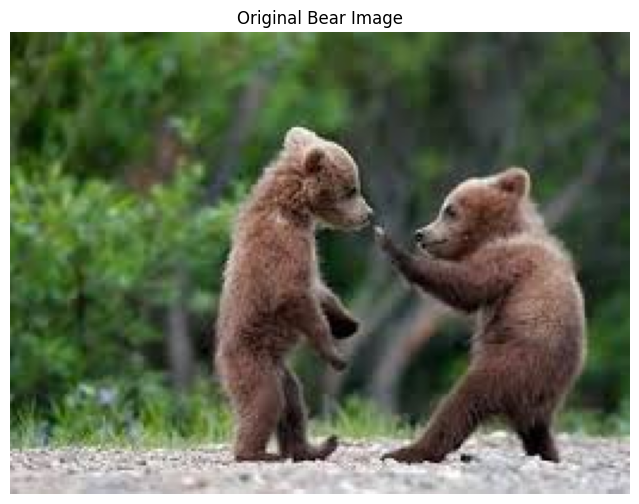

In [ ]:
# Load the "two bears.jpg" image using PIL
bear_image = Image.open(os.path.join(LECTURE_DIRECTORY, "two bears.jpg"))

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(bear_image)
plt.title("Original Bear Image")
plt.axis("off")
plt.show()
plt.close()

In [ ]:
# Convert the image to a numpy array
bear_array = np.array(bear_image)
print("Image shape:", bear_array.shape)
print("Image dimensions:", bear_array.ndim)
print("Data type:", bear_array.dtype)

Image shape: (194, 260, 3)
Image dimensions: 3
Data type: uint8


In [ ]:
# Convert the numpy array to a PyTorch tensor
bear_tensor = torch.from_numpy(bear_array)
print("PyTorch tensor shape:", bear_tensor.shape)

# Let's see a small part of the tensor - just a 2x2 pixel square from top-left
print("\n2x2 pixel square from top-left:")
print(bear_tensor[:2, :2])

PyTorch tensor shape: torch.Size([194, 260, 3])

2x2 pixel square from top-left:
tensor([[[30, 47, 13],
         [30, 47, 11]],

        [[30, 47, 13],
         [27, 44,  8]]], dtype=torch.uint8)


## Image Channels and Manipulation

Color images typically have 3 channels (RGB: Red, Green, Blue). We can access and manipulate these channels using raw tensor indexing.


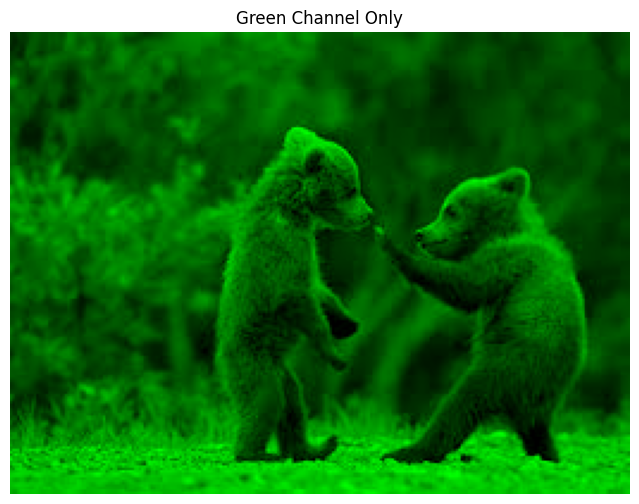

In [ ]:
# Creating a green-only version by zeroing out the red and blue channels
green_only = bear_tensor.clone()  # Create a copy to avoid modifying the original
green_only[:, :, 0] = 0  # Zero out red channel
green_only[:, :, 2] = 0  # Zero out blue channel

plt.figure(figsize=(8, 6))
plt.imshow(green_only.numpy())
plt.title("Green Channel Only")
plt.axis("off")
plt.show()

## Problem 3.1

Create a negative of the bear image by subtracting each pixel value from 255 using raw tensor operations.


In [ ]:
# Your code here to create a negative image:
# negative_image = ?
#
# # Display your result

## Problem 3.2

Flip the bear image horizontally and vertically.

**Example:** Here's how to flip an image horizontally.


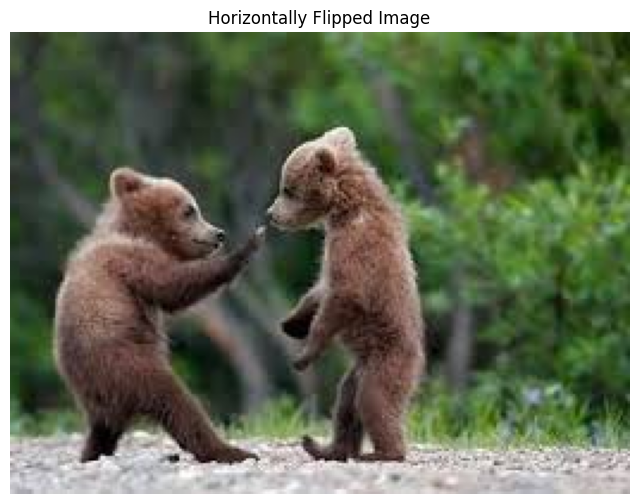

In [ ]:
# Flipping the image horizontally using torch.flip
flipped_bear = torch.flip(
    bear_tensor, dims=[1]
)  # Flip along the width dimension (dim=1)

plt.figure(figsize=(8, 6))
plt.imshow(flipped_bear.numpy())
plt.title("Horizontally Flipped Image")
plt.axis("off")
plt.show()

In [ ]:
# Your code here to rotate the image:
# rotated_image = ?
#
# # Display your result

# 4. Exploring the Self Regulation Ontology (SRO) Dataset

The SRO dataset contains data from several self-report surveys measuring various aspects of self-regulatory abilities.
Let's load and explore this dataset to understand the relationship between demographic factors, impulsivity traits, and risk perception.


In [ ]:
sro_datadir = os.path.join(LECTURE_DIRECTORY, "SRO")

individual_datadir = os.path.join(sro_datadir, "Individual_Measures")
df = pd.read_csv(os.path.join(individual_datadir, "threebytwo.csv.gz"), index_col=0)

In [ ]:
# Create average reaction time data
avg_rts = df[['worker_id', 'rt']].groupby('worker_id').mean()

In [ ]:
# Load health outcomes dataset
health = pd.read_csv(os.path.join(sro_datadir, "health.csv"), index_col=0)

In [ ]:
# Join the data (naturally uses the index column, which is subject)
joined = health.join(avg_rts)

## Problem 4.1: Visualize relationship between reaction time and depression score (including correlation)

In [ ]:
# Visualize relationship between reaction time and depression score

## Problem 4.2: Visualize relationship between worthlessness and depression scores (including correlation)

In [ ]:
# Visualize relationship between two self-report measures

# 5. Exploring Language Development Data from Wordbank

Wordbank is a database of language development data from children across different languages.
Let's load and explore this dataset to understand patterns in language acquisition.


In [ ]:
# Load the Wordbank data
wordbank_data = pd.read_csv(os.path.join(LECTURE_DIRECTORY, "wordbank_bychild.csv"))
print("Wordbank data shape:", wordbank_data.shape)
print("\nColumns in Wordbank data:")
print(wordbank_data.columns.tolist())
print("\nFirst few rows:")
print(wordbank_data.head())

Wordbank data shape: (96246, 22)

Columns in Wordbank data:
['downloaded', 'language', 'form', 'dataset_name', 'child_id', 'age', 'comprehension', 'production', 'is_norming', 'birth_order', 'caregiver_education', 'ethnicity', 'race', 'sex', 'birth_weight', 'born_early_or_late', 'gestational_age', 'zygosity', 'language_exposures', 'health_conditions', 'monolingual', 'typically_developing']

First few rows:
   downloaded        language     form dataset_name  child_id  age  \
0  2025-04-01  Arabic (Saudi)  WSOther         JISH     87537    8   
1  2025-04-01  Arabic (Saudi)  WSOther         JISH     87538    8   
2  2025-04-01  Arabic (Saudi)  WSOther         JISH     87539   10   
3  2025-04-01  Arabic (Saudi)  WSOther         JISH     87540   11   
4  2025-04-01  Arabic (Saudi)  WSOther         JISH     87541   11   

   comprehension  production  is_norming birth_order  ... race   sex  \
0            NaN         NaN       False       First  ...  NaN  Male   
1            NaN         N

<ipython-input-26-51d4b83d2a7c>:2: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  wordbank_data = pd.read_csv(os.path.join(LECTURE_DIRECTORY, "wordbank_bychild.csv"))


In [ ]:
# Get unique languages in the dataset
unique_languages = wordbank_data["language"].unique()
print(f"\nUnique languages in the dataset ({len(unique_languages)}):")
print(unique_languages[:10])  # Print first 10 languages if there are many


Unique languages in the dataset (40):
['Arabic (Saudi)' 'American Sign Language' 'British Sign Language'
 'Cantonese' 'Catalan' 'Croatian' 'Czech' 'Danish' 'Dutch'
 'English (British)']


In [ ]:
# Filter for rows with non-null production values
wordbank_filtered = wordbank_data.dropna(subset=["production"])

# Calculate summary statistics by language and age
production_averages = {}

# Get summary stats for each language
for language in unique_languages:
    # Get data just for this language
    summary_data_by_child = wordbank_filtered[wordbank_filtered['language'] == language]

    # Skip languages with too little data
    if len(summary_data_by_child) < 10:
        continue

    # Produce summaries of the mean, std, and sample length, grouped by age bin
    prod_means = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).mean()
    prod_stds = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).std()
    prod_lens = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).agg(len)

    # Get the independent variable
    ages = prod_means['age']

    # Get the dependent variable mean
    means = prod_means['production']

    # Get the dependent variable SEMs
    stds = prod_stds['production']
    lens = prod_lens['production']
    sems = stds / np.sqrt(lens)

    # Store computed things for future use
    production_averages[language] = (ages, means, sems)

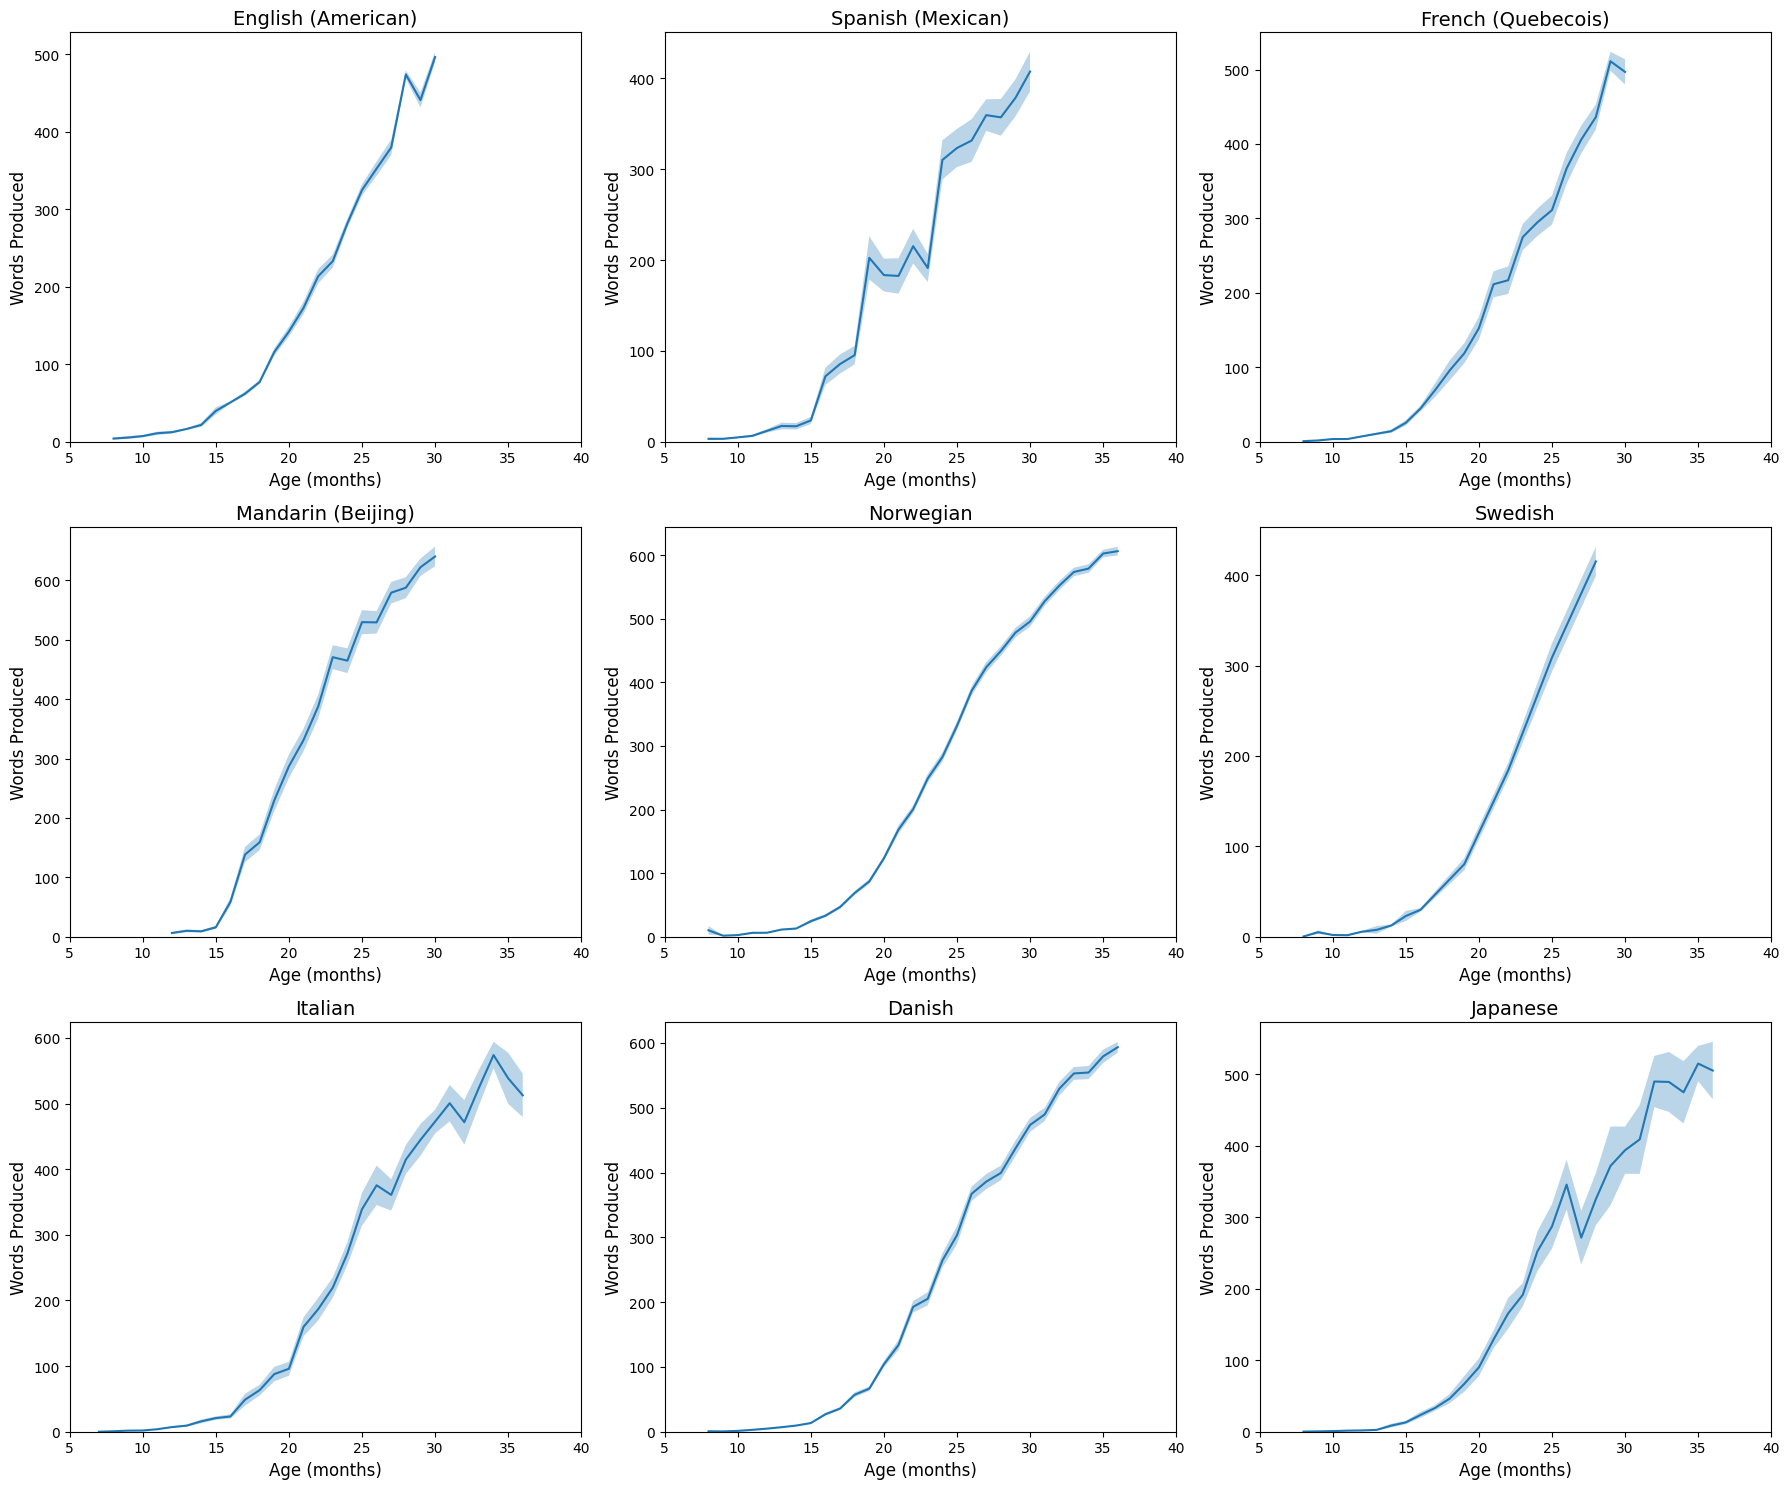

In [ ]:
# Plot data for several languages
languages_to_plot = [
    "English (American)",
    "Spanish (Mexican)",
    "French (Quebecois)",
    "Mandarin (Beijing)",
    "Norwegian",
    "Swedish",
    "Italian",
    "Danish",
    "Japanese",
]

plt.figure(figsize=(18, 15))

for i, language in enumerate(languages_to_plot, 1):
    if language in production_averages:
        ages, means, sems = production_averages[language]

        plt.subplot(3, 3, i)
        plt.plot(ages, means)
        plt.fill_between(ages, means - sems, means + sems, alpha=0.3)
        plt.xlabel('Age (months)', fontsize=12)
        plt.ylabel('Words Produced', fontsize=12)
        plt.title(language, fontsize=14)
        plt.xlim(5, 40)
        plt.ylim(0, None)
    else:
        print(f"No data available for {language}")

plt.tight_layout()
plt.show()

In [ ]:
# Let's look at a logistic function
def parameterized_logistic(x, a, b, c):
    """Logistic function with parameters:
    a - horizontal shift (midpoint)
    b - steepness of the curve
    c - maximum value (asymptote)
    """
    return c / (1 + np.exp(-b * (x - a)))

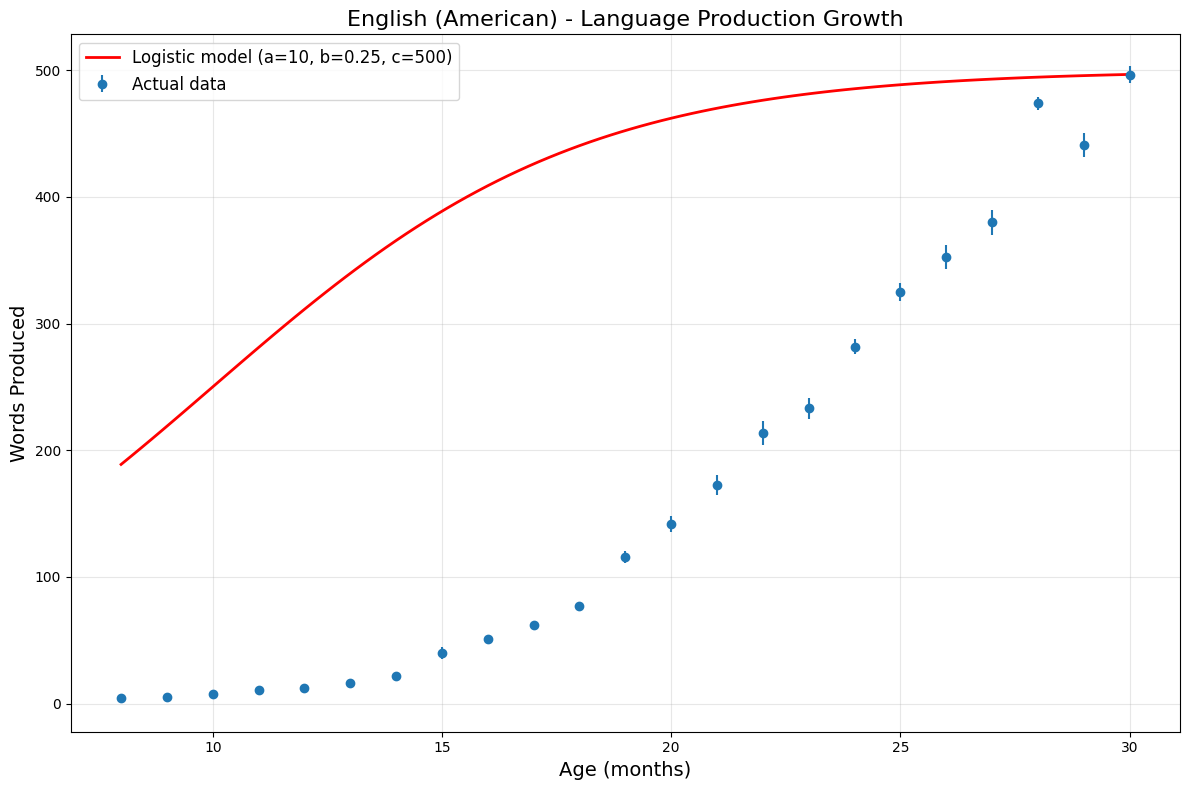

In [ ]:
# Interactive example for English (American)
language = "English (American)"
if language in production_averages:
    ages, means, sems = production_averages[language]

    #### PARAMETERS TO ADJUST MANUALLY ####
    a = 10  # midpoint (age at which production is 50% of maximum)
    b = 0.25  # steepness (higher value = steeper curve)
    c = 500  # maximum value (asymptote)

    # Generate smooth curve for the logistic function
    x_smooth = np.linspace(min(ages), max(ages), 100)
    y_model = parameterized_logistic(x_smooth, a, b, c)

    plt.figure(figsize=(12, 8))
    # Plot actual data with error bars
    plt.errorbar(ages, means, yerr=sems, fmt='o', label='Actual data')
    # Plot logistic model
    plt.plot(x_smooth, y_model, 'r-', linewidth=2, label=f'Logistic model (a={a}, b={b}, c={c})')

    plt.title(f"{language} - Language Production Growth", fontsize=16)
    plt.xlabel("Age (months)", fontsize=14)
    plt.ylabel("Words Produced", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Problem 5.1

Choose another language from the dataset and try to fit a logistic growth curve by manually adjusting the parameters:
- a: midpoint (age at which production is 50% of maximum)
- b: steepness (higher value = steeper curve)
- c: maximum value (asymptote)

Compare the parameters with those of English. Is the functional form of language acquisition similar across languages?

**Example:** Here's how you can start by selecting a different language:

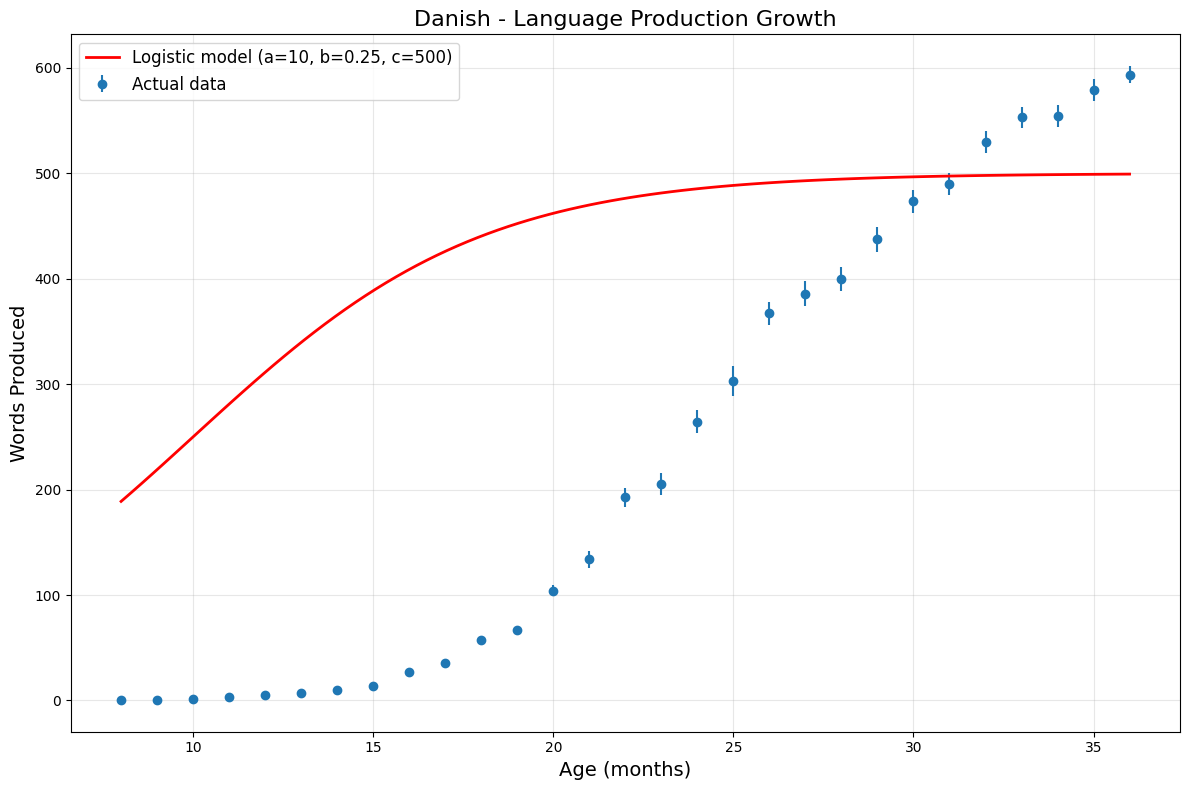

In [ ]:
# Example: Try fitting Danish data
language = "Danish"
if language in production_averages:
    ages, means, sems = production_averages[language]

    # Parameters to adjust manually - start with the same as English and adjust
    a = 10  # midpoint (age at which production is 50% of maximum)
    b = 0.25  # steepness (higher value = steeper curve)
    c = 500  # maximum value (asymptote)

    # Generate smooth curve for the logistic function
    x_smooth = np.linspace(min(ages), max(ages), 100)
    y_model = parameterized_logistic(x_smooth, a, b, c)

    plt.figure(figsize=(12, 8))
    # Plot actual data with error bars
    plt.errorbar(ages, means, yerr=sems, fmt='o', label='Actual data')
    # Plot logistic model
    plt.plot(x_smooth, y_model, 'r-', linewidth=2, label=f'Logistic model (a={a}, b={b}, c={c})')

    plt.title(f"{language} - Language Production Growth", fontsize=16)
    plt.xlabel("Age (months)", fontsize=14)
    plt.ylabel("Words Produced", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# Your code here to fit another language:
# language = "Your chosen language"
# ...

# 6. Analyzing Neural Data

Now let's analyze a neural dataset to understand how different brain regions respond to different visual stimuli.
We'll use an HDF5 file containing neural recordings from ventral visual cortex.


In [ ]:
# Load the neural data
neural_data_file = os.path.join(LECTURE_DIRECTORY, "ventral_neural_data.hdf5")
Ventral_Dataset = h5py.File(neural_data_file, "r")

In [ ]:
# What are the unique values in the category field? Let's use the "unique" function from numpy
categories = Ventral_Dataset['image_meta']['category'][:]
unique_categories = np.unique(categories)
print("Unique categories:", unique_categories)
# There are eight categories of objects in this dataset

Unique categories: [b'Animals' b'Boats' b'Cars' b'Chairs' b'Faces' b'Fruits' b'Planes'
 b'Tables']


In [ ]:
# What are the unique values in the object_name field?
objects = Ventral_Dataset['image_meta']['object_name'][:]
unique_objects = np.unique(objects)
print("Unique objects:", len(unique_objects))
# That's quite a few objects

Unique objects: 64


In [ ]:
# Let's print out a programmatically-constructed sentence telling us how many objects there are
number_unique_objects = len(unique_objects)
print(f'There are {number_unique_objects} unique objects')

There are 64 unique objects


In [ ]:
# What's the relationship between the categories and the objects?
# Let's create a dictionary whose keys are categories and whose values
# are arrays of unique objects in each category
objects_by_category = {c: np.unique(objects[categories == c])
                       for c in unique_categories}

### The Neural Data Itself

Now let's look at the neural responses in the dataset.

In [ ]:
# Let's check out the time-binned trial-averaged data, which shows how neurons respond over time
time_binned_data = Ventral_Dataset['time_binned_trial_averaged']
print("Shape of time_binned_trial_averaged:", time_binned_data.shape)
# This gives us responses for each image, time bin, and neuron

Shape of time_binned_trial_averaged: (5760, 11, 296)


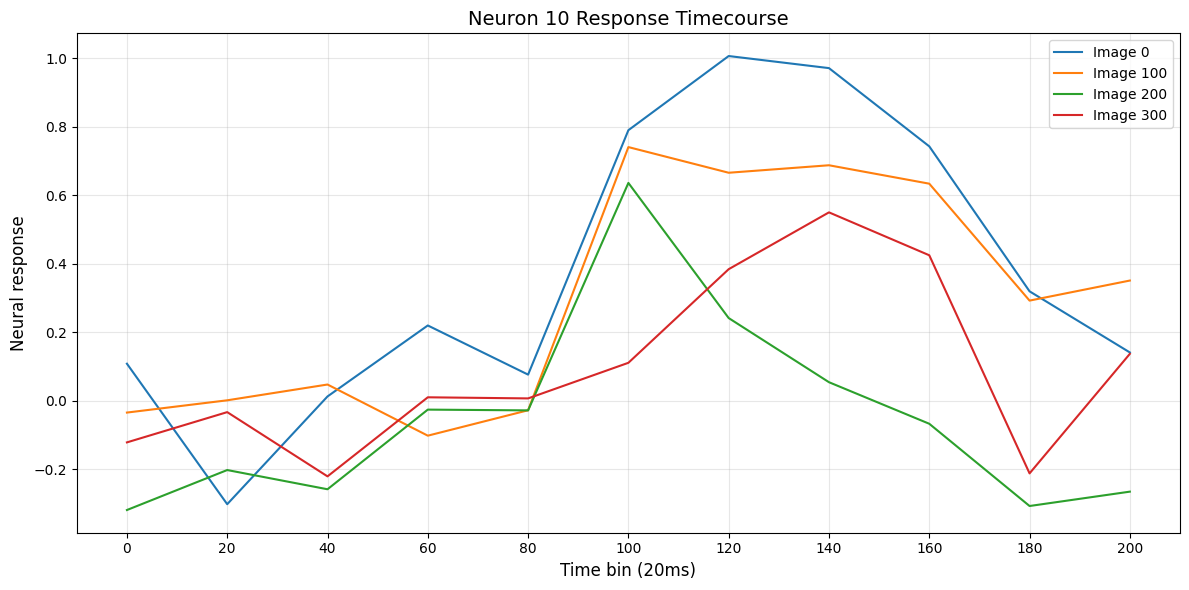

In [ ]:
# Let's look at a single neuron's response to a few different images over time
neuron_index = 10
example_image_indices = [0, 100, 200, 300]

plt.figure(figsize=(12, 6))
for img_idx in example_image_indices:
    # Extract time course for this neuron/image
    neuron_response = time_binned_data[img_idx, :, neuron_index]
    plt.plot(neuron_response, label=f'Image {img_idx}')

plt.xlabel('Time bin (20ms)', fontsize=12)
plt.xticks(np.arange(11), np.arange(11) * 20)
plt.ylabel('Neural response', fontsize=12)
plt.title(f'Neuron {neuron_index} Response Timecourse', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Problem 6.1: Compute time-averaged responses by category

Let's see how different neurons respond to different categories of objects. For this, we need to:
1. Get the time-averaged neural responses
2. Group them by category
3. Compute the average response for each category

First, let's get the time-averaged neural data:

In [ ]:
# Get the time-averaged trial-averaged neural data
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged']
print("Shape of time_averaged_trial_averaged:", Neural_Data.shape)

Shape of time_averaged_trial_averaged: (5760, 296)


In [ ]:
# Check what metadata we have about the neurons
Ventral_Dataset['neural_meta'].keys()

<KeysViewHDF5 ['AIT_NEURONS', 'ANIMAL_INFO', 'ARRAY_INFO', 'CIT_NEURONS', 'IT_NEURONS', 'PIT_NEURONS', 'V4_NEURONS']>

In [ ]:
# Get indices for V4 and IT neurons
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS'][:]
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS'][:]
print(f'There are {len(V4_NEURONS)} V4 neurons')
print(f'There are {len(IT_NEURONS)} IT neurons')

There are 128 V4 neurons
There are 168 IT neurons


In [ ]:
# Create subsets of neural data for each brain region
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]
print(f'V4 neural data shape: {V4_Neural_Data.shape}')
print(f'IT neural data shape: {IT_Neural_Data.shape}')

V4 neural data shape: (5760, 128)
IT neural data shape: (5760, 168)


Now, implement a function to compute the average neural response for each category.
Complete the code below:

In [ ]:
# TODO: Complete this function to compute the average response for each category
def compute_category_averages(neural_data, categories):
    """
    Compute the average neural response for each category.

    Parameters:
    neural_data: Array of shape (n_images, n_neurons) containing neural responses
    categories: Array of shape (n_images,) containing category labels for each image

    Returns:
    Dictionary mapping category names to average responses
    """
    # Convert to PyTorch tensors
    neural_data_tensor = torch.tensor(neural_data, dtype=torch.float32)

    # YOUR CODE HERE
    # 1. Create an empty dictionary to store results

    # 2. For each unique category:
    #    a. Find all images of that category
    #    b. Compute the average response for those images
    #    c. Store in the dictionary

Now, use your function to compute the average response for V4 and IT:

In [ ]:
# Compute the average response for each category in V4 and IT
V4_category_averages = compute_category_averages(V4_Neural_Data, categories)
IT_category_averages = compute_category_averages(IT_Neural_Data, categories)

# Let's check if the results are reasonable
if V4_category_averages is not None:
  for category in list(V4_category_averages.keys())[:3]:  # Show first 3 categories
      print(f"Category: {category}")
      print(f"  V4 shape: {V4_category_averages[category].shape}")
      print(f"  IT shape: {IT_category_averages[category].shape}")

In [ ]:
# Now let's visualize these results
# Create tensors containing all category averages for easier plotting
if V4_category_averages is not None:
  V4_category_means = torch.stack([V4_category_averages[cat] for cat in unique_categories])
  IT_category_means = torch.stack([IT_category_averages[cat] for cat in unique_categories])

  # Plot heatmaps
  plt.figure(figsize=(15, 12))

  # V4 heatmap
  plt.subplot(2, 1, 1)
  sns.heatmap(
      V4_category_means.numpy(),
      cmap="viridis",
      xticklabels=range(0, len(V4_NEURONS)),
      yticklabels=[c.decode('utf-8') if isinstance(c, bytes) else c for c in unique_categories],
  )
  plt.title("Mean V4 Neural Response by Category", fontsize=15)
  plt.xlabel("V4 Neuron Index", fontsize=12)
  plt.ylabel("Stimulus Category", fontsize=12)

  # IT heatmap
  plt.subplot(2, 1, 2)
  sns.heatmap(
      IT_category_means.numpy(),
      cmap="viridis",
      xticklabels=range(0, len(IT_NEURONS)),
      yticklabels=[c.decode('utf-8') if isinstance(c, bytes) else c for c in unique_categories],
  )
  plt.title("Mean IT Neural Response by Category", fontsize=15)
  plt.xlabel("IT Neuron Index", fontsize=12)
  plt.ylabel("Stimulus Category", fontsize=12)

  plt.tight_layout()
  plt.show()

else:
  V4_category_means = None
  IT_category_means = None
  print("No results to plot")

No results to plot


#### Exercise 2: Compare overall responses between V4 and IT for each category

Let's now compare the average response magnitude between V4 and IT for each category.
Complete the code below:

In [ ]:
# TODO: Compute the mean response across all neurons for each category in V4 and IT
def compute_region_category_means(category_means_tensor):
    """
    Compute the mean response across all neurons for each category.

    Parameters:
    category_means_tensor: Tensor of shape (n_categories, n_neurons)

    Returns:
    Tensor of shape (n_categories,) containing mean responses
    """
    # YOUR CODE HERE

In [ ]:
if V4_category_means is not None:
  # Compute mean responses
  V4_mean_by_category = compute_region_category_means(V4_category_means)
  IT_mean_by_category = compute_region_category_means(IT_category_means)

  # Plot the comparison
  plt.figure(figsize=(12, 8))
  bar_width = 0.35
  x = np.arange(len(unique_categories))

  plt.bar(x - bar_width/2, V4_mean_by_category.numpy(), bar_width, label='V4')
  plt.bar(x + bar_width/2, IT_mean_by_category.numpy(), bar_width, label='IT')

  plt.xlabel('Category', fontsize=12)
  plt.ylabel('Mean Response', fontsize=12)
  plt.title('Mean Neural Response by Brain Region and Category', fontsize=15)
  plt.xticks(x, [c.decode('utf-8') if isinstance(c, bytes) else c for c in unique_categories], rotation=45, ha='right')
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

### Animal-Specific Neural Responses

The neural recordings in this dataset come from different animals. Let's examine whether there are
differences in neural responses between them.

In [ ]:
# Check the animal information
animal_info = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:]
unique_animals = np.unique(animal_info)
print(f"Animals in the dataset: {unique_animals}")

Animals in the dataset: [b'Chabo' b'Tito']


In [ ]:
# Create animal masks and extract data for each animal
animal1_mask = animal_info == b'Chabo'
animal2_mask = animal_info == b'Tito'

# Extract IT neurons for each animal
animal1_IT_neurons = animal1_mask[IT_NEURONS]
animal2_IT_neurons = animal2_mask[IT_NEURONS]

print(f"Animal 1 (Chabo) has {np.sum(animal1_IT_neurons)} IT neurons")
print(f"Animal 2 (Tito) has {np.sum(animal2_IT_neurons)} IT neurons")

Animal 1 (Chabo) has 58 IT neurons
Animal 2 (Tito) has 110 IT neurons


In [ ]:
# Get neural data for each animal's IT neurons
animal1_IT_Data = Neural_Data[:, IT_NEURONS[animal1_IT_neurons]]
animal2_IT_Data = Neural_Data[:, IT_NEURONS[animal2_IT_neurons]]

# Convert to PyTorch for computation
animal1_IT_Data_tensor = torch.tensor(animal1_IT_Data, dtype=torch.float32)
animal2_IT_Data_tensor = torch.tensor(animal2_IT_Data, dtype=torch.float32)

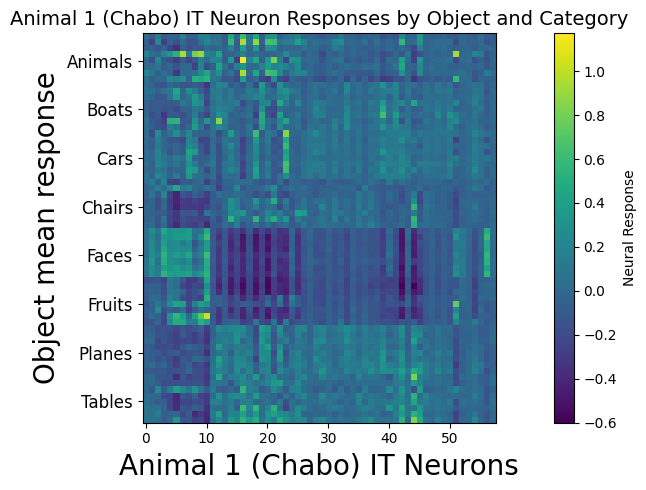

In [ ]:
# Let's look at object-level responses
# For Animal 1 (Chabo)
animal1_IT_object_means_by_category = []
for c in unique_categories:
    category_objects = objects_by_category[c]
    object_means = []
    for o in category_objects:
        object_mask = objects == o
        if np.any(object_mask):
            object_data = animal1_IT_Data_tensor[object_mask]
            if len(object_data) > 0:
                object_mean = torch.mean(object_data, dim=0)
                object_means.append(object_mean)
    if object_means:
        category_means = torch.stack(object_means)
        animal1_IT_object_means_by_category.append(category_means)

# Stack all category data
if animal1_IT_object_means_by_category:
    animal1_IT_means_stacked = torch.cat(animal1_IT_object_means_by_category, dim=0)

    plt.figure(figsize=(12, 5))
    plt.imshow(animal1_IT_means_stacked.numpy())
    plt.xlabel('Animal 1 (Chabo) IT Neurons', fontsize=20)
    plt.ylabel('Object mean response', fontsize=20)

    # Calculate positions for category labels
    ytick_positions = []
    current_pos = 0
    for c in unique_categories:
        category_objects = objects_by_category[c]
        ytick_positions.append(current_pos + len(category_objects)//2)
        current_pos += len(category_objects)

    plt.yticks(ytick_positions,
               [c.decode('utf-8') if isinstance(c, bytes) else c for c in unique_categories],
               fontsize=12)
    plt.colorbar(label='Neural Response')
    plt.title('Animal 1 (Chabo) IT Neuron Responses by Object and Category', fontsize=14)
    plt.tight_layout()
    plt.show()

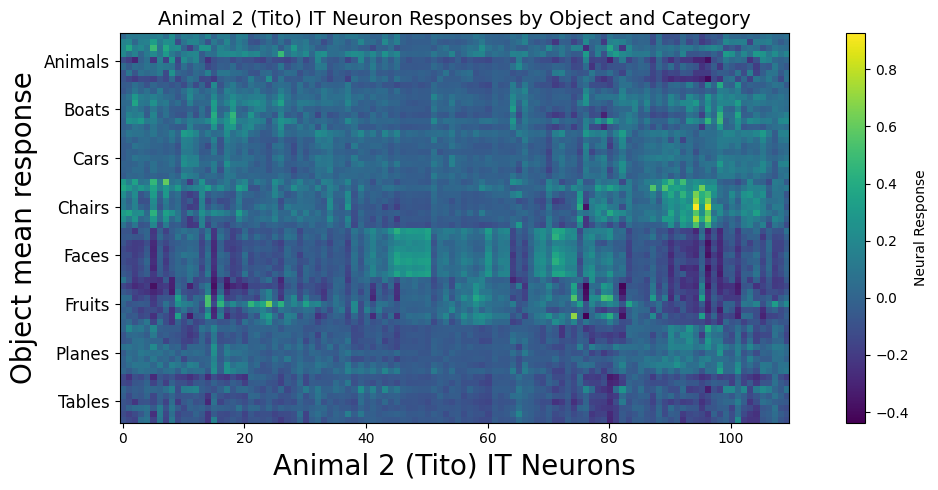

In [ ]:
# For Animal 2 (Tito)
animal2_IT_object_means_by_category = []
for c in unique_categories:
    category_objects = objects_by_category[c]
    object_means = []
    for o in category_objects:
        object_mask = objects == o
        if np.any(object_mask):
            object_data = animal2_IT_Data_tensor[object_mask]
            if len(object_data) > 0:
                object_mean = torch.mean(object_data, dim=0)
                object_means.append(object_mean)
    if object_means:
        category_means = torch.stack(object_means)
        animal2_IT_object_means_by_category.append(category_means)

# Stack all category data
if animal2_IT_object_means_by_category:
    animal2_IT_means_stacked = torch.cat(animal2_IT_object_means_by_category, dim=0)

    plt.figure(figsize=(12, 5))
    plt.imshow(animal2_IT_means_stacked.numpy())
    plt.xlabel('Animal 2 (Tito) IT Neurons', fontsize=20)
    plt.ylabel('Object mean response', fontsize=20)

    # Calculate positions for category labels
    ytick_positions = []
    current_pos = 0
    for c in unique_categories:
        category_objects = objects_by_category[c]
        ytick_positions.append(current_pos + len(category_objects)//2)
        current_pos += len(category_objects)

    plt.yticks(ytick_positions,
               [c.decode('utf-8') if isinstance(c, bytes) else c for c in unique_categories],
               fontsize=12)
    plt.colorbar(label='Neural Response')
    plt.title('Animal 2 (Tito) IT Neuron Responses by Object and Category', fontsize=14)
    plt.tight_layout()
    plt.show()

### What do you notice about the neural responses between the two animals? Are there differences in category selectivity patterns?